---
title: "matplotlib 한글 폰트 오류 해결"
date: 2020-04-17T11:15:47+09:00
tags:
  - "Data Visualisation"
  - "Python"
  - "line grpah"
  - "Matplotlib"
  - "선 그래프"
  - "한글 폰트 오류 해결"
categories:
  - "Data Visualisation"
  - "Python"
  - "line grpah"
  - "Matplotlib"
  - "선 그래프"
menu: 
  settings:
    name: matplotlib 한글 폰트 오류 해결
---

## 공지

제 수업을 듣는 사람들이 계속적으로 실습할 수 있도록 강의 파일을 만들었습니다. 늘 도움이 되기를 바라며. 참고했던 교재 및 Reference는 꼭 확인하셔서 교재 구매 또는 관련 Reference를 확인하시기를 바랍니다. 

도움이 되었다면 `Github`에 `Star`를 눌러주세요.
- [python_visualisation](https://github.com/chloevan/python_visualisation)

## Matplotlib 한글폰트 오류 해결

한글을 사랑하지만, 코딩의 예외다. 프로그래밍 언어 자체가 영어기반이기 때문에 그런것도 있고, 아무튼 한글 부분이 네모 박스로 표시되면서 한글폰트가 깨지는 현상이 종종 발생한다. 오류를 해결하려면 먼저 한글폰트를 지정하는 다음의 코드를 추가해야 한다. 

우선 실제로 한글 폰트가 깨지는지 확인해보는 코드를 작성해보자. 

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_H

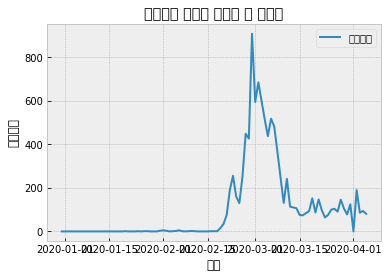

In [5]:
# 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터 데이터프레임으로 변환
covid_19 = pd.read_excel("/Users/jihoonjung/Documents/python_visualisation/data/20200406-COVID-19-geographic-disbtribution-worldwide.xlsx")

# KOR 데이터만 추출, val. countryterritoryCode
covid_kor = covid_19[covid_19['countryterritoryCode'] == 'KOR']
covid_kor.set_index('dateRep', inplace=True)

plt.style.use('bmh')

plt.plot(covid_kor.index, covid_kor.cases)
plt.title('대한민국 코로나 확진자 수 그래프')
plt.xlabel('기간')
plt.ylabel('확진자수')
plt.legend(labels=['확진자수'], loc='best')
plt.show()

위 그래프를 보니, 실제로 네모박스가 나왔다. 이 때 어떻게 해결해야 할까? 우선 OS 환경에 따라 다르다. 그러나, 기본 원리는 똑같다. 
폰트 경로를 지정하면 된다.

## MacOS 버전 

강사는 MacOS를 사용하기 때문에, 두줄 코드만 입력하면 된다. 
```python
from matplotlib import rc
rc('font', family="AppleGothic")
```

위 코드를 입력 후, 다시 출력해본다. 

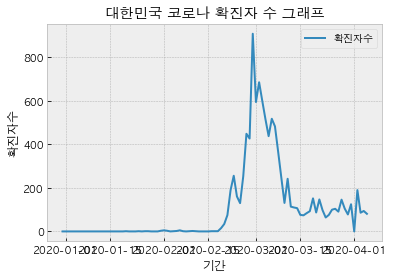

In [6]:
# 한글폰트 오류 해결
from matplotlib import rc
rc('font', family="AppleGothic")

plt.style.use('bmh')

plt.plot(covid_kor.index, covid_kor.cases)
plt.title('대한민국 코로나 확진자 수 그래프')
plt.xlabel('기간')
plt.ylabel('확진자수')
plt.legend(labels=['확진자수'], loc='best')
plt.show()

이렇게 정상적으로 출력되는 것을 확인할 수 있다. 

## Windows 버전
윈도우즈의 경우 Mac과 달리 font_manager 코드가 추가가 된다. 

```python
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./한글폰트.ttf" # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
```

## Reference

“똑똑이” [Python] matplotlib 한글폰트 설정방법, http://wideeyed.blog.me/221225208497



